In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

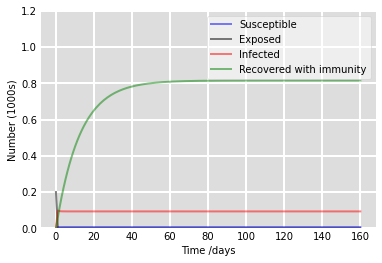

In [44]:
# Total population, P.
P = 300
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0 = 200, 0.5, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = beta - E0- I0 - R0
# Contact rate, beta, and mean recovery rate, (in 1/days).
beta,mu,mu_1, mu_2, mu_3, alpha_1, alpha_2, alpha_3, alpha_4 = 100, 0.3, 0.15, 0.35, 0.08, .9, 0.4, 0.7, 0.15
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SEIR model differential equations.
def deriv(y, t, beta, mu, mu_1, mu_2, mu_3, alpha_1, alpha_2, alpha_3, alpha_4):
    S, E, I, R = y
    dSdt = beta - mu* S -alpha_1 * S * E - alpha_4 * S * I 
    dEdt = alpha_1 * S * E - alpha_2 * E * I - mu_1* E
    dIdt = alpha_2  * E * I + alpha_4 * S * I -I * (alpha_3 + mu_2)
    dRdt = alpha_3 * I - mu_3 * R
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, mu, mu_1, mu_2, mu_3, alpha_1, alpha_2, alpha_3, alpha_4))
S, E, I, R = ret.T

# Plot the data on four separate curves for S(t), E(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'black', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()